
<pre>
<strong>age - </strong> idade em anos
<strong>sex - </strong>(1 = masculino; 0 = feminino)
<strong>cp - </strong>  tipo de dor no peito
<strong>trestb - </strong> pspressão arterial em repouso (em mmHg na admissão ao hospital)
<strong>chol - </strong> soro colestoral em mg / dl
<strong>fbs - </strong> (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)
<strong>restecg - </strong> restecgresultados eletrocardiográficos em repouso
<strong>thalach - </strong> frequência cardíaca máxima alcançada
<strong>exang - </strong> induzida por exercício (1 = sim; 0 = não)
<strong>oldpeak - </strong> Depressão do segmento ST induzida pelo exercício em relação ao repouso
<strong>slope - </strong> inclinaçãoa inclinação do segmento ST de pico de exercício
<strong>ca - </strong> número de grandes vasos (0-3) colorido por flourosopy
<strong>thal - </strong> 3 = normal; 6 = defeito fixo; 7 = defeito reversível
<strong>target - </strong> 1 ou 0
</pre>

In [29]:
import pandas
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [7]:
dados = pandas.read_csv('heart.csv')

In [9]:
dados.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Transf thal em dados categóricos 

In [12]:
dados['thal'] = dados['thal'].astype('category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e5c631080>,
      dtype=object)

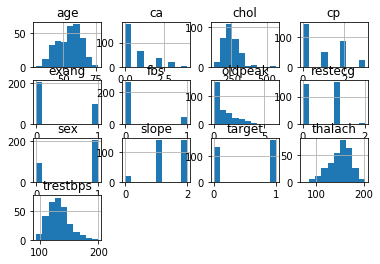

In [13]:
dados.hist()

In [14]:
dados.skew(axis = 0, skipna = True)

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

### Balanceando os dados

In [15]:
from sklearn.preprocessing import power_transform
data_array = dados.as_matrix().tolist()
balanced_data = power_transform(data_array, method='yeo-johnson') # box-cox não pq tem valores negativos
balanced_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 0.95617112,  0.68100522,  1.48721736, ..., -0.83967894,
        -1.94671807,  0.91452919],
       [-1.83100612,  0.68100522,  1.05819226, ..., -0.83967894,
        -0.58323189,  0.91452919],
       [-1.44297775, -1.46841752,  0.37938898, ..., -0.83967894,
        -0.58323189,  0.91452919],
       ...,
       [ 1.55723049,  0.68100522, -1.01565157, ...,  1.3411448 ,
         1.17607165, -1.09345881],
       [ 0.26072171,  0.68100522, -1.01565157, ...,  0.8719233 ,
         1.17607165, -1.09345881],
       [ 0.26072171, -1.46841752,  0.37938898, ...,  0.8719233 ,
        -0.58323189, -1.09345881]])

In [16]:
dados['fbs'] = balanced_data
dados['ca'] = balanced_data
dados['slope'] = balanced_data
dados['oldpeak'] = balanced_data
dados['chol'] = balanced_data


In [17]:
dados.skew(axis = 0, skipna = True)

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol       -0.052593
fbs        -0.052593
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak    -0.052593
slope      -0.052593
ca         -0.052593
thal       -0.476722
target     -0.179821
dtype: float64

### PReditoras

In [49]:
x = dados[['trestbps', 'age', 'oldpeak', 'slope', 'fbs', 'thalach','sex', 'chol','restecg','exang','ca']].values.tolist()
x = [v for v in x]
x[:5]

[[145.0,
  63.0,
  0.9561711226885921,
  0.9561711226885921,
  0.9561711226885921,
  150.0,
  1.0,
  0.9561711226885921,
  0.0,
  0.0,
  0.9561711226885921],
 [130.0,
  37.0,
  -1.831006117113923,
  -1.831006117113923,
  -1.831006117113923,
  187.0,
  1.0,
  -1.831006117113923,
  1.0,
  0.0,
  -1.831006117113923],
 [130.0,
  41.0,
  -1.4429777482286796,
  -1.4429777482286796,
  -1.4429777482286796,
  172.0,
  0.0,
  -1.4429777482286796,
  0.0,
  0.0,
  -1.4429777482286796],
 [120.0,
  56.0,
  0.14765607844858486,
  0.14765607844858486,
  0.14765607844858486,
  178.0,
  1.0,
  0.14765607844858486,
  1.0,
  0.0,
  0.14765607844858486],
 [120.0,
  57.0,
  0.26072170523389065,
  0.26072170523389065,
  0.26072170523389065,
  163.0,
  0.0,
  0.26072170523389065,
  1.0,
  1.0,
  0.26072170523389065]]

### Preditas

In [50]:
y = dados.iloc[:, 13].values  
y[:5]

array([1, 1, 1, 1, 1])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123456) 

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators=200,
    oob_score=True,
    class_weight='balanced_subsample',
    random_state=42
)

classifier

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [54]:
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        28
           1       0.74      0.70      0.72        33

   micro avg       0.70      0.70      0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



In [56]:
print(confusion_matrix(y_test, y_pred))

[[20  8]
 [10 23]]


### Treinando o modelo com KNN

In [57]:
model = KNeighborsClassifier(n_neighbors=6) 
model.fit(x, y)
predicted = model.predict(X_test)
predicted

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [58]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        28
           1       0.90      0.79      0.84        33

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [59]:
print(confusion_matrix(y_test, predicted))


[[25  3]
 [ 7 26]]
